In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# no missing values are there in the data

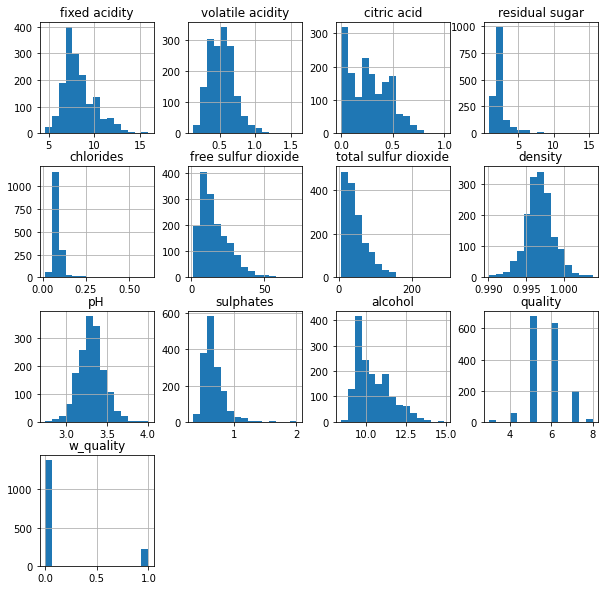

In [81]:
df.hist(bins=15,figsize=(10,10))
plt.show()

In [10]:
# plotting the varible quality to explore the data and see the distribution of good quality of wines

(array([ 10.,  53., 681., 638., 199.,  18.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

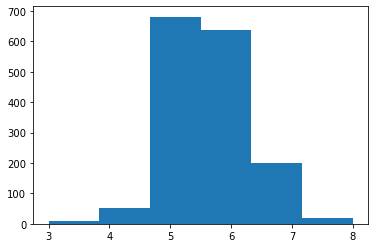

In [21]:
plt.hist(df['quality'],bins=6)

In [22]:
# Now , we can draw the correlation matrix to see the relation between the variables

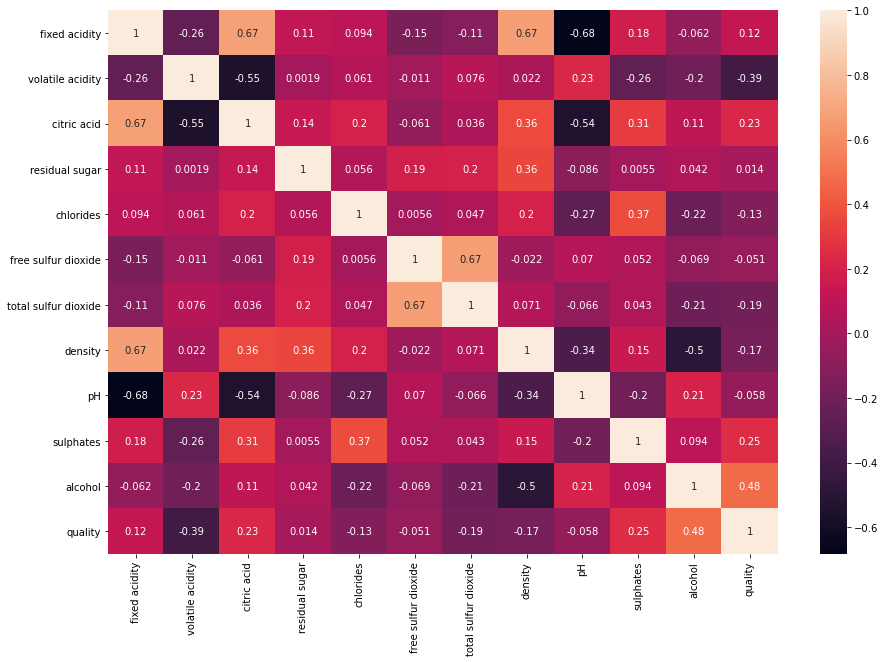

In [27]:
cor=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.show()

In [28]:
# According to the question cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [43]:
for i in range(len(df['quality'])):
    if df['quality'][i] >= 7:
        df['w_quality'][i]= 1
    else:
        df['w_quality'][i]=0

<ipython-input-43-fd3459abeed1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w_quality'][i]=0
<ipython-input-43-fd3459abeed1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['w_quality'][i]= 1


In [52]:
# seperating the dependent and independent variables
x=df.drop(['quality','w_quality'],axis=1)
y=df['w_quality']

In [53]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [54]:
x.shape,y.shape

((1599, 11), (1599,))

In [55]:
# check the quantity of good and poor wines
y.value_counts()

0    1382
1     217
Name: w_quality, dtype: int64

In [ ]:
# we can see the the quality of poor wine is more than the good wine

In [48]:
# Now we will prepare the data for modeling
# first we will scale the data so that all features are on a same scale

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x)

In [58]:
scaled_x=pd.DataFrame(x1,columns=x.columns)
scaled_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [59]:
# Now we will split the train and test data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,random_state=0)

In [60]:
# Now comes the modeling part

In [61]:
#first using descision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
cl=DecisionTreeClassifier(random_state=10)
cl.fit(train_x,train_y)
y_predict=cl.predict(test_x)

In [70]:
from sklearn.metrics import classification_report as cr
print(cr(test_y,y_predict))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       355
           1       0.51      0.80      0.62        45

    accuracy                           0.89       400
   macro avg       0.74      0.85      0.78       400
weighted avg       0.92      0.89      0.90       400



In [ ]:
# using roc uac curves

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(roc_auc_score(test_y,y_predict))


0.8507042253521127


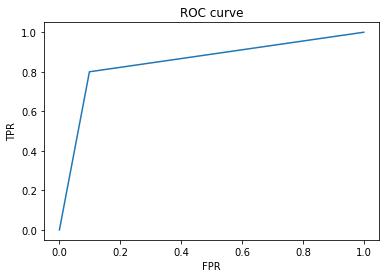

In [78]:
fpr, tpr,_ = roc_curve(test_y, y_predict)

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

**Random forest**

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150)
rf.fit(train_x, train_y)
predict_y = rf.predict(test_x)

In [84]:
print(cr(test_y,predict_y))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.69      0.56      0.62        45

    accuracy                           0.92       400
   macro avg       0.82      0.76      0.79       400
weighted avg       0.92      0.92      0.92       400

